In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/')
import utils as ut
import avida as avida
import evals as evals

In [4]:
X=np.loadtxt("../data/s1_mapped1.txt")
y=np.loadtxt("../data/s1_mapped2.txt")
(n1, d1) = X.shape
(n2, d2) = y.shape
print("Dimensions of input datasets are: ", "X= ", X.shape, " Y= ", y.shape)
basic_labels1 = np.arange(start=0.0,stop=1.0,step=1./n1)
basic_labels2 = np.arange(start=0.0,stop=1.0,step=1./n2)
our_normalize = 0

Y1, Y2 = avida.avida_tsne(X,y,alpha=0.9,normalize=our_normalize,visualize=0,graph_dist=True)

bifurcated_tree_FOSCTTM_avida = np.mean(evals.calc_domainAveraged_FOSCTTM(Y1, Y2))
bifurcated_tree_integration_avida = evals.integration_score(Y1,Y2)
bifurcated_tree_vision_loss_avida = evals.vis_loss(X,y,Y1,Y2,our_normalize)
bifurcated_tree_alignment_avida = evals.test_alignment_score(Y1,Y2)
bifurcated_tree_accuracy_ours_avida = evals.our_accuracy(Y1, Y2)

print('AVIDA FOSCTTM score: '+str(bifurcated_tree_FOSCTTM_avida))
print('AVIDA Integration score: '+str(bifurcated_tree_integration_avida))
print('AVIDA t-SNE Loss: '+str(bifurcated_tree_vision_loss_avida))
print('AVIDA Alignment Score: '+str(bifurcated_tree_alignment_avida))
print('AVIDA Our Accuracy Score: '+str(bifurcated_tree_accuracy_ours_avida))

Dimensions of input datasets are:  X=  (300, 2000)  Y=  (300, 1000)
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 2.345848
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 1.599117
Iteration 100: error is 21.512148
Iteration 200: error is 21.511566
Iteration 300: error is 0.669580
It.  |Err         
-------------------
    0|3.445569e-03|
   10|1.401824e-03|
   20|5.531075e-04|
   30|3.589732e-04|
   40|2.086089e-04|
   50|2.711928e-04|
   60|6.951063e-05|
0.03297324439311838
Iteration 400: error is 0.708399
It.  |Err         
-------------------
    0|3.432894e-03|
   10|1.110731e-03|
   20|5.964069e-04|
   30|1.886056e-04|
   40|1.708314e-04|
   50|1.219359e-04|
   60|1.547043e-04|
   70|4.222742e-05|
0.030322748677861645
Iteration 500: error is 0.724290
It.  |Err         
-------------------
    0|3.466679e-03|
   10|7.706921e-04|
   20|2.527590e-04|
   30|1.224783e-04|
   40|8.642929e-05|
0

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Colored based on cell')

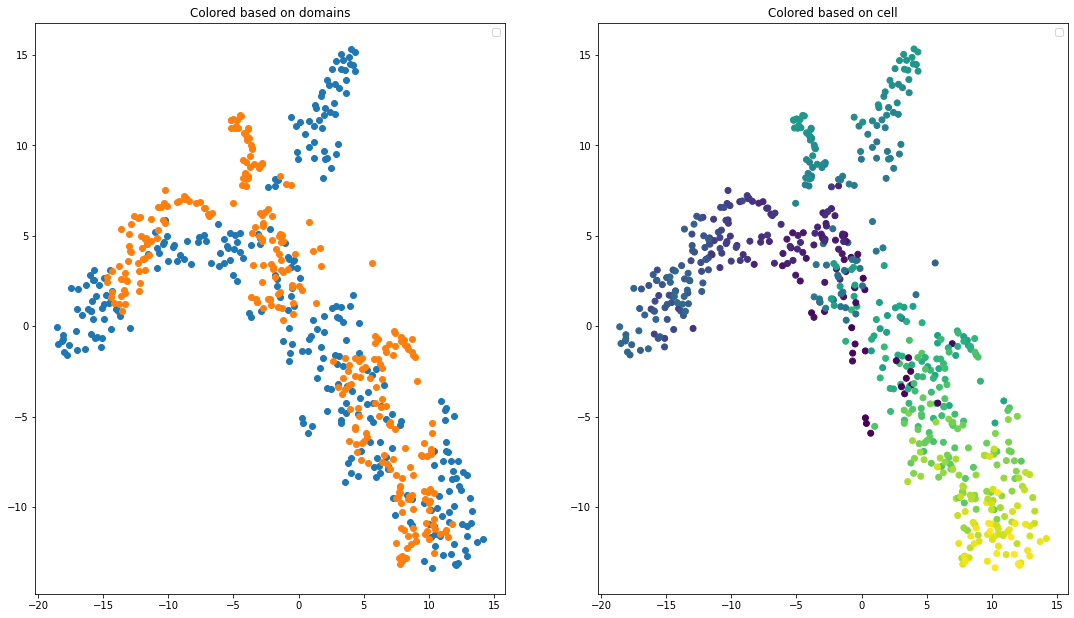

In [8]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)

basic_labels1 = np.arange(start=0.0,stop=1.0,step=1./n1)
basic_labels2 = np.arange(start=0.0,stop=1.0,step=1./n2)

axs[0].scatter(Y2[:,0],Y2[:,1])
axs[0].scatter(Y1[:,0],Y1[:,1])
axs[0].legend()
axs[0].set_title("Colored based on domains")

axs[1].scatter(Y2[:,0],Y2[:,1],c=basic_labels2)
axs[1].scatter(Y1[:,0],Y1[:,1],c=basic_labels1)
axs[1].legend()
axs[1].set_title("Colored based on cell")